In [133]:
import torch
import datasets 
import pickle 

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
import researchpy as rp

## Data Load

In [3]:
original_paths = {'med' : "D:\\PROJECT\\out\\original\\medium\per_res.pkl", 'small' : "D:\\PROJECT\\out\\original\\small\per_res.pkl"}
aug_paths = {'med' : "D:\\PROJECT\\out\\aug\\medium\per_sentence_res.pkl", 'small' : "D:\\PROJECT\\out\\aug\\small\per_sentence_res.pkl"}

original_set = {k : pickle.load(open(v, 'rb')).to_pandas() for k, v in original_paths.items()}
aug_set = {k : pickle.load(open(v, 'rb')).to_pandas() for k, v in aug_paths.items()}

In [6]:
original_set['med']

,code,docstring,pred_string,rouge2_precision,rouge2_recall,rouge2_fmeasure,bleu_score,meteor_score
0,"def sina_xml_to_url_list(xml_data):\n """"""st...",str->list\n Convert XML to URL List.\n F...,[str->list\n Convert XML to URL List.\n ...,1.0,0.8750,0.9333,81.873075,0.836017
1,"def dailymotion_download(url, output_dir='.', ...",Downloads Dailymotion videos by URL.,[Downloads Dailymotion videos by URL.],1.0,1.0000,1.0000,100.000000,0.997685
2,"def sina_download(url, output_dir='.', merge=T...",Downloads Sina videos by URL.,[Downloads Sina videos by URL.],1.0,1.0000,1.0000,100.000000,0.997685
3,"def sprint(text, *colors):\n """"""Format text...",Format text with color or other effects into A...,[Format text with color or other effects into ...,1.0,1.0000,1.0000,100.000000,0.999711
4,"def print_log(text, *colors):\n """"""Print a ...",Print a log message to standard error.,[Print a log message to standard error.],1.0,1.0000,1.0000,100.000000,0.999023
...,...,...,...,...,...,...,...,...
14913,"def from_grayscale(im, channels_on=(True, True...",Return a canvas from a grayscale image.\n\n ...,[Return a canvas from a grayscale image.\n\n ...,1.0,0.2500,0.4000,2.075434,0.255379
14914,"def get_uuid(length=32, version=1):\n """"""\n...",Returns a unique ID of a given length.\n Us...,[Returns a unique ID of a given length.\n U...,1.0,0.7143,0.8333,69.967254,0.700968
14915,"def get_unique_key_from_get(get_dict):\n """"...",Build a unique key from get data,[Build a unique key from get data],1.0,1.0000,1.0000,100.000000,0.998542
14916,"def get_domain(url):\n """""" Returns domain n...",Returns domain name portion of a URL,[Returns domain name portion of a URL],1.0,1.0000,1.0000,100.000000,0.998542


## T-Test

In [122]:
metric_cols = ["rouge2_precision", "rouge2_recall", "rouge2_fmeasure", "bleu_score", "meteor_score"]
filter_cols = ["bleu_score", "meteor_score"]

In [131]:
small_var = {}
med_var = {}

for col in metric_cols:
    small_var[col] = [sp.stats.variation(original_set['small'][col]), sp.stats.variation(aug_set['small'][col])]
    med_var[col] = [sp.stats.variation(original_set['med'][col]), sp.stats.variation(aug_set['med'][col])]

In [134]:
small_t = {}
med_t = {}

for col in metric_cols:
    med_t[col] = rp.ttest(group1= original_set['med'][col], group1_name= "No Augment",
        group2= aug_set['med'][col], group2_name= "Augmented")
    small_t[col] = rp.ttest(group1= original_set['small'][col], group1_name= "No Augment",
        group2= aug_set['small'][col], group2_name= "Augmented")

D:\CONDA\envs\build\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
D:\CONDA\envs\build\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
D:\CONDA\envs\build\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
D:\CONDA\envs\build\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
D:\C

In [136]:
med_t

{'rouge2_precision': (     Variable        N      Mean        SD        SE  95% Conf.  Interval
  0  No Augment  14918.0  0.994896  0.041508  0.000340   0.994230  0.995562
  1   Augmented  14918.0  0.938578  0.169779  0.001390   0.935854  0.941303
  2    combined  29836.0  0.966737  0.126753  0.000734   0.965299  0.968175,
                         Independent t-test     results
  0  Difference (No Augment - Augmented) =       0.0563
  1                   Degrees of freedom =   29834.0000
  2                                    t =      39.3557
  3                Two side test p value =       0.0000
  4               Difference < 0 p value =       1.0000
  5               Difference > 0 p value =       0.0000
  6                            Cohen's d =       0.4557
  7                            Hedge's g =       0.4557
  8                        Glass's delta =       1.3568
  9                          Pearson's r =       0.2222),
 'rouge2_recall': (     Variable        N      Mean      

In [137]:
small_t

{'rouge2_precision': (     Variable        N      Mean        SD        SE  95% Conf.  Interval
  0  No Augment  14918.0  0.989982  0.059853  0.000490   0.989022  0.990943
  1   Augmented  14918.0  0.933436  0.176074  0.001442   0.930610  0.936261
  2    combined  29836.0  0.961709  0.134503  0.000779   0.960183  0.963235,
                         Independent t-test     results
  0  Difference (No Augment - Augmented) =       0.0565
  1                   Degrees of freedom =   29834.0000
  2                                    t =      37.1384
  3                Two side test p value =       0.0000
  4               Difference < 0 p value =       1.0000
  5               Difference > 0 p value =       0.0000
  6                            Cohen's d =       0.4300
  7                            Hedge's g =       0.4300
  8                        Glass's delta =       0.9448
  9                          Pearson's r =       0.2102),
 'rouge2_recall': (     Variable        N      Mean      

In [128]:
small_t = {}
med_t = {}

for col in metric_cols:
    med_t[col] = sp.stats.ttest_ind(original_set['med'][col], aug_set['med'][col])
    small_t[col] = sp.stats.ttest_ind(original_set['small'][col], aug_set['small'][col])

In [129]:
small_t

{'rouge2_precision': Ttest_indResult(statistic=37.13840483612598, pvalue=3.5958992029279794e-295),
 'rouge2_recall': Ttest_indResult(statistic=0.04839586481357865, pvalue=0.9614010787992787),
 'rouge2_fmeasure': Ttest_indResult(statistic=10.29915980158103, pvalue=7.8227780277243185e-25),
 'bleu_score': Ttest_indResult(statistic=11.414696594404464, pvalue=4.0783679039634845e-30),
 'meteor_score': Ttest_indResult(statistic=3.839175517135955, pvalue=0.0001237029068382733)}

In [130]:
med_t

{'rouge2_precision': Ttest_indResult(statistic=39.355697635678446, pvalue=0.0),
 'rouge2_recall': Ttest_indResult(statistic=0.05692593407985247, pvalue=0.9546045766201486),
 'rouge2_fmeasure': Ttest_indResult(statistic=10.202181255405415, pvalue=2.126157291906879e-24),
 'bleu_score': Ttest_indResult(statistic=11.558162794770753, pvalue=7.809733173221546e-31),
 'meteor_score': Ttest_indResult(statistic=3.8909762418594815, pvalue=0.00010005843368274822)}

## Generate Deltas

In [111]:
med_deltas = pd.DataFrame()
small_deltas = pd.DataFrame()

In [113]:
for col in filter_cols:
    med_deltas[col] = aug_set['med'][col] - original_set['med'][col]
    small_deltas[col] = aug_set['small'][col] - original_set['small'][col]

In [114]:
med_deltas['bleu_score'] = med_deltas['bleu_score'] / 100
small_deltas['bleu_score'] = small_deltas['bleu_score'] / 100

## Flatten Sets

Needed for multilayer histogram

In [102]:
med_flat = []
small_flat = []

med_aug_flat = []
small_aug_flat = []

In [104]:
for col in filter_cols:
    small_tmp = pd.DataFrame()
    small_aug_tmp = pd.DataFrame()

    medium_tmp = pd.DataFrame()
    medium_aug_tmp = pd.DataFrame()

    small_tmp['score'] = original_set['small'][col] / 100 if col == "bleu_score" else original_set['small'][col]
    small_tmp['metric'] = col
    small_aug_tmp['score'] = aug_set['small'][col] / 100 if col == "bleu_score" else aug_set['small'][col]
    small_aug_tmp['metric'] = col

    medium_tmp['score'] = original_set['med'][col] / 100 if col == "bleu_score" else original_set['med'][col]
    medium_tmp['metric'] = col
    medium_aug_tmp['score'] = aug_set['med'][col] / 100 if col == "bleu_score" else aug_set['med'][col]
    medium_aug_tmp['metric'] = col

    med_flat.append(medium_tmp)
    small_flat.append(small_tmp)

    med_aug_flat.append(medium_aug_tmp)
    small_aug_flat.append(small_aug_tmp)

In [105]:
med_flat = pd.concat(med_flat).reset_index()
small_flat = pd.concat(small_flat).reset_index()

med_aug_flat = pd.concat(med_aug_flat).reset_index()
small_aug_flat = pd.concat(small_aug_flat).reset_index()

## Distribution Histograms

[Text(0.5, 1.0, 'CodeBERT No Augment')]

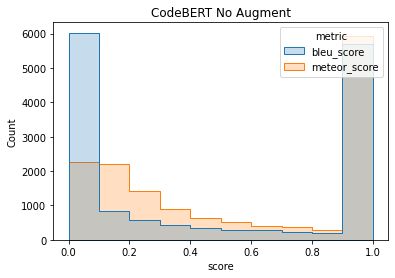

In [106]:
sns.histplot(med_flat, x='score', hue='metric', bins=10, element="step").set(title='CodeBERT No Augment')

[Text(0.5, 1.0, 'CodeBERT Augmented')]

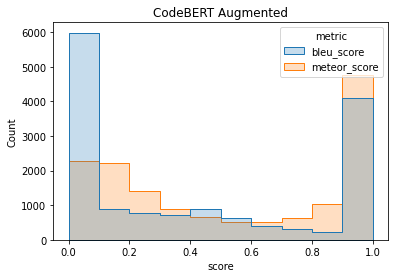

In [107]:
sns.histplot(med_aug_flat, x='score', hue='metric', bins=10, element="step").set(title='CodeBERT Augmented')

[Text(0.5, 1.0, 'RoBERTa No Augment')]

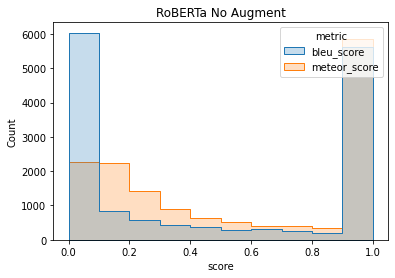

In [108]:
sns.histplot(small_flat, x='score', hue='metric', bins=10, element="step").set(title='RoBERTa No Augment')

[Text(0.5, 1.0, 'RoBERTa Augmented')]

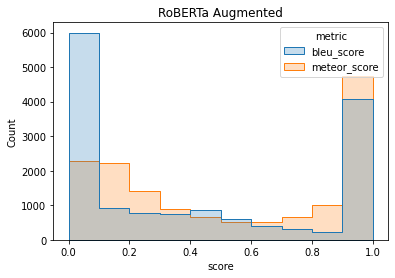

In [109]:
sns.histplot(small_aug_flat, x='score', hue='metric', bins=10, element="step").set(title='RoBERTa Augmented')

## Delta Histograms

In [145]:
x = med_deltas['bleu_score']
x[x > 0.0]

704      3.777635e-08
1225     2.317543e-13
1227     1.727801e-20
1588     3.852118e-01
1682     1.040787e-27
             ...     
12931    1.561970e-01
13231    1.150365e-02
13292    1.561970e-01
13394    1.395080e-01
14355    1.774741e-01
Name: bleu_score, Length: 67, dtype: float64

[Text(0.5, 1.0, 'Delta Bleu Score on CodeBERT')]

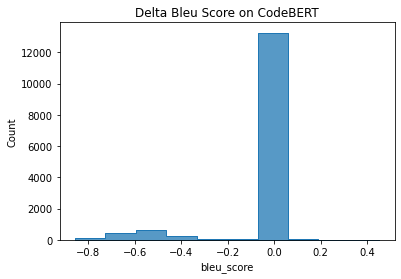

In [143]:
sns.histplot(med_deltas['bleu_score'], bins=10, element="step").set(title='Delta Bleu Score on CodeBERT')

[Text(0.5, 1.0, 'Delta Bleu Score on RoBERTa')]

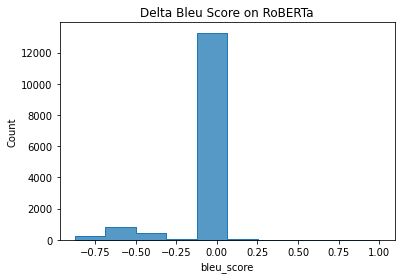

In [110]:
sns.histplot(small_deltas['bleu_score'], bins=10, element="step").set(title='Delta Bleu Score on RoBERTa')

[Text(0.5, 1.0, 'Delta METEOR Score on CodeBERT')]

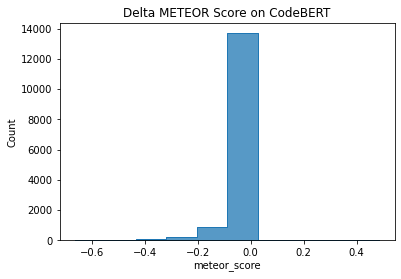

In [146]:
sns.histplot(med_deltas['meteor_score'], bins=10, element="step").set(title='Delta METEOR Score on CodeBERT')

[Text(0.5, 1.0, 'Delta METEOR Score on RoBERTa')]

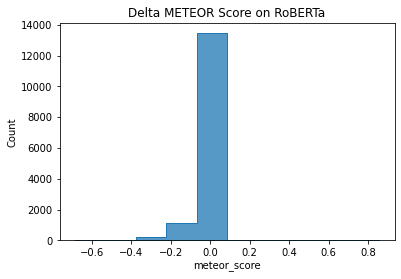

In [141]:
sns.histplot(small_deltas['meteor_score'], bins=10, element="step").set(title='Delta METEOR Score on RoBERTa')